<a href="https://colab.research.google.com/github/abenya82/COSC-208-001/blob/main/resnet_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC 208.001

Your Task:
    
    Run the classifier resnet model with various pictures.
    Run all notebook cells and make adjustments for your needs.


You will need imagenet_classes.txt in your working directory.  
Running all cells in sequential order will download all needed tools and files.

Quick and dirty implementation of the Resnet image classifier taken directly from the PyTorch documentation page.  https://pytorch.org/hub/pytorch_vision_resnet/



In [ ]:
# Mount google drive if your images are on google drive
#  Otherwise, images must be upload every time you load this notebook

from google.colab import drive
drive.mount('/content/drive')

In [12]:
# we have to make sure we are using the right version of libraries we are importing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch

# Install necessary libraries if not already installed

!pip install torch torchvision

from PIL import Image
import torchvision.transforms as transforms

In [13]:
# Uncomment the line for the version of the model you'd like to use.


model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()



# The ouput shows the details of the model, layer by layer.
# You may inspect to see exactly what the NN is doing.
# This output will change if you load a different version of resnet.


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:



def classifier(image_tensor):
  """Classifies an image using NN model.

  Args:
      image_tensor: A PyTorch tensor representing the image.

  Returns:
      A tuple containing the predicted class index and the probabilities for each class.
  """
  with torch.no_grad():
    output = model(image_tensor)
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  _, predicted_class_index = torch.max(probabilities, 0)
  return predicted_class_index, probabilities


## LOAD YOUR IMAGE BELOW!   🍀

change the image_path to the file_path of your file.

Below I have NOT mounted my google drive.  
I have uploaded a file called 'img3.jpg'


In [15]:


# Load the image
image_path = 'img3.jpg'


In [21]:





input_image = Image.open(image_path)



# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# Classify the image
predicted_class_index, probabilities = classifier(input_batch)

# Print the results
print(f"Predicted class index: {predicted_class_index}")
print(f"Probabilities: {probabilities[:5]}")


# Get the class labels (you might need to download the ImageNet labels)
# Download the ImageNet class labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

# Load the class labels
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Print the predicted class label
predicted_class_label = categories[predicted_class_index]
print(f"Predicted class label: {predicted_class_label}")


Predicted class index: 308
Probabilities: tensor([5.5050e-10, 1.6003e-07, 8.2576e-09, 7.6101e-11, 6.4863e-11])
--2025-04-29 17:05:36--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.6’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2025-04-29 17:05:36 (15.3 MB/s) - ‘imagenet_classes.txt.6’ saved [10472/10472]

Predicted class label: fly


In the next cell we take the predictions we made and match them up with their category titles.

The model can classify images based on its training data.  The Training data is organized into the categories listed in the txt file.

In [22]:

# Get the top 5 predicted classes
top5_prob, top5_catid = torch.topk(probabilities, 5)

# Print the top 5 predicted classes and their probabilities
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())


fly 0.5050487518310547
bee 0.3889620304107666
honeycomb 0.05457809939980507
ant 0.018149886280298233
dragonfly 0.016137702390551567


Here we display the gathered information in a presentable format.

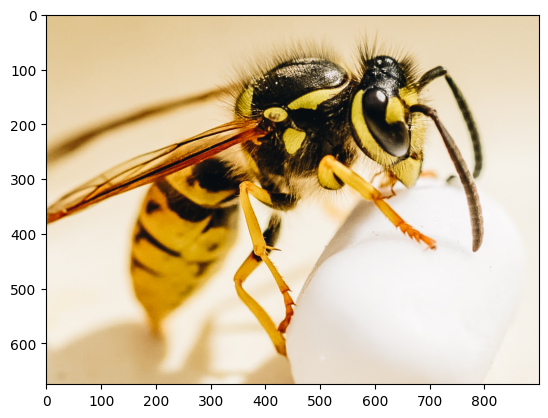

Top 5 predicted classes:
fly: 0.5050
bee: 0.3890
honeycomb: 0.0546
ant: 0.0181
dragonfly: 0.0161


In [23]:


# Display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

# Get the top 5 predicted classes
top5_prob, top5_catid = torch.topk(probabilities, 5)

# Print the top 5 predicted classes and their probabilities
print("Top 5 predicted classes:")
for i in range(top5_prob.size(0)):
    print(f"{categories[top5_catid[i]]}: {top5_prob[i].item():.4f}")


# Your Task:

Run the model with different pictures and record the results.
Try to get a misclassification and try to explain why the model failed.
Use pictures from a wide variety of sources.  Try pictures that you take yourself.

Answer the following questions:

    What is training data?
    Why are neural networks called "black boxes"?
    Why is the Resnet model restricted to identifing only a certain number of categories?


Your group should turn in a write up showing up to 6 images that you have classified, what the classifier results were and any comments about the classification.  Explain why you think the classifier made its conclusions.
